Initializing library

In [3]:
import pandas as pd
import numpy as np
import pylab as P
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Read the data into python and clean up the data

In [4]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

The variable datetime consist of hour and date of the count. We try to divide data into hourly information (e.g. morning, brunch, lunch, etc...). Second and minute information is useless (since all of them are zeros).

Edit: I separated the weather category to its own feature. Improve by tiny amount.

Edit2: I categorized according to day of the week.

Edit3: I separated by hour category to its own feature.

In [87]:
from datetime import date as datepy

year = np.zeros(len(df))
month = np.zeros(len(df))
date = np.zeros(len(df))
hour = np.zeros(len(df))
minute = np.zeros(len(df))
second = np.zeros(len(df))
weekday = np.zeros(len(df))

for i in range(len(df.datetime)):
    year[i] = df['datetime'][i][0:4]
    month[i] = df['datetime'][i][5:7]
    date[i] = df['datetime'][i][8:10]
    hour[i] = df['datetime'][i][11:13]
    weekday[i] = datepy(int(year[i]),int(month[i]),int(date[i])).isoweekday()

df['year'] = year
df['month'] = month
df['date'] = date
df['hour'] = hour
df['weather1'] = df['weather'].map(lambda x: float(x==1))
df['weather2'] = df['weather'].map(lambda x: float(x==2))
df['weather3'] = df['weather'].map(lambda x: float(x==3))
df['weather4'] = df['weather'].map(lambda x: float(x==4))
df['weekday'] = weekday

df['hour1'] = df['hour'].map(lambda x: float(x==1))
df['hour2'] = df['hour'].map(lambda x: float(x==2))
df['hour3'] = df['hour'].map(lambda x: float(x==3))
df['hour4'] = df['hour'].map(lambda x: float(x==4))
df['hour5'] = df['hour'].map(lambda x: float(x==5))
df['hour6'] = df['hour'].map(lambda x: float(x==6))
df['hour7'] = df['hour'].map(lambda x: float(x==7))
df['hour8'] = df['hour'].map(lambda x: float(x==8))
df['hour9'] = df['hour'].map(lambda x: float(x==9))
df['hour10'] = df['hour'].map(lambda x: float(x==10))
df['hour11'] = df['hour'].map(lambda x: float(x==11))
df['hour12'] = df['hour'].map(lambda x: float(x==12))
df['hour13'] = df['hour'].map(lambda x: float(x==13))
df['hour14'] = df['hour'].map(lambda x: float(x==14))
df['hour15'] = df['hour'].map(lambda x: float(x==15))
df['hour16'] = df['hour'].map(lambda x: float(x==16))
df['hour17'] = df['hour'].map(lambda x: float(x==17))
df['hour18'] = df['hour'].map(lambda x: float(x==18))
df['hour19'] = df['hour'].map(lambda x: float(x==19))
df['hour20'] = df['hour'].map(lambda x: float(x==20))
df['hour21'] = df['hour'].map(lambda x: float(x==21))
df['hour22'] = df['hour'].map(lambda x: float(x==22))
df['hour23'] = df['hour'].map(lambda x: float(x==23))
df['hour24'] = df['hour'].map(lambda x: float(x==0))

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 45 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null float64
month         10886 non-null float64
date          10886 non-null float64
hour          10886 non-null float64
weather1      10886 non-null float64
weather2      10886 non-null float64
weather3      10886 non-null float64
weather4      10886 non-null float64
weekday       10886 non-null float64
hour1         10886 non-null float64
hour2         10886 non-null float64
hour3         10886 non-null float64
hour4         10886 

In [89]:
#for the test data
from datetime import date as datepy

year_test = np.zeros(len(df_test))
month_test = np.zeros(len(df_test))
date_test = np.zeros(len(df_test))
hour_test = np.zeros(len(df_test))
minute_test = np.zeros(len(df_test))
second_test = np.zeros(len(df_test))
weekday_test = np.zeros(len(df_test))

for i in range(len(df_test.datetime)):
    year_test[i] = df_test['datetime'][i][0:4]
    month_test[i] = df_test['datetime'][i][5:7]
    date_test[i] = df_test['datetime'][i][8:10]
    hour_test[i] = df_test['datetime'][i][11:13]
    weekday_test[i] = datepy(int(year_test[i]),int(month_test[i]),int(date_test[i])).isoweekday()


df_test['year'] = year_test
df_test['month'] = month_test
df_test['date'] = date_test
df_test['hour'] = hour_test
df_test['weather1'] = df_test['weather'].map(lambda x: float(x==1))
df_test['weather2'] = df_test['weather'].map(lambda x: float(x==2))
df_test['weather3'] = df_test['weather'].map(lambda x: float(x==3))
df_test['weather4'] = df_test['weather'].map(lambda x: float(x==4))
df_test['weekday'] = weekday_test

df_test['hour1'] = df_test['hour'].map(lambda x: float(x==1))
df_test['hour2'] = df_test['hour'].map(lambda x: float(x==2))
df_test['hour3'] = df_test['hour'].map(lambda x: float(x==3))
df_test['hour4'] = df_test['hour'].map(lambda x: float(x==4))
df_test['hour5'] = df_test['hour'].map(lambda x: float(x==5))
df_test['hour6'] = df_test['hour'].map(lambda x: float(x==6))
df_test['hour7'] = df_test['hour'].map(lambda x: float(x==7))
df_test['hour8'] = df_test['hour'].map(lambda x: float(x==8))
df_test['hour9'] = df_test['hour'].map(lambda x: float(x==9))
df_test['hour10'] = df_test['hour'].map(lambda x: float(x==10))
df_test['hour11'] = df_test['hour'].map(lambda x: float(x==11))
df_test['hour12'] = df_test['hour'].map(lambda x: float(x==12))
df_test['hour13'] = df_test['hour'].map(lambda x: float(x==13))
df_test['hour14'] = df_test['hour'].map(lambda x: float(x==14))
df_test['hour15'] = df_test['hour'].map(lambda x: float(x==15))
df_test['hour16'] = df_test['hour'].map(lambda x: float(x==16))
df_test['hour17'] = df_test['hour'].map(lambda x: float(x==17))
df_test['hour18'] = df_test['hour'].map(lambda x: float(x==18))
df_test['hour19'] = df_test['hour'].map(lambda x: float(x==19))
df_test['hour20'] = df_test['hour'].map(lambda x: float(x==20))
df_test['hour21'] = df_test['hour'].map(lambda x: float(x==21))
df_test['hour22'] = df_test['hour'].map(lambda x: float(x==22))
df_test['hour23'] = df_test['hour'].map(lambda x: float(x==23))
df_test['hour24'] = df_test['hour'].map(lambda x: float(x==0))

In [90]:
X = df.drop(['datetime','casual','registered'],axis =1 )
y = X['count'][0::]
y = y.values
X = X.drop(['count'],axis = 1)
X = X.values

In [91]:
# for the test value
X_test = df_test.drop(['datetime'],axis =1 )
X_test = X_test.values

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train.shape, X_test.shape

#testing out the cross val score
print( cross_val_score(RandomForestRegressor(20,max_depth=15), X, y, cv=4) )


[ 0.59346356  0.85849165  0.87046187  0.86544787]


[  7.68670619e-03   1.60503446e-03   5.21677949e-02   6.48090516e-03
   7.85132390e-02   2.64571926e-02   2.65160154e-02   6.66295297e-03
   8.86777216e-02   4.25728996e-02   9.33314687e-03   4.73658745e-01
   1.04312998e-03   7.75933505e-04   6.00269481e-03   5.05659757e-06
   4.25947293e-02   9.54184407e-05   1.64996522e-04   4.66341580e-05
   1.27658613e-06   1.19867521e-04   1.32209694e-03   3.49287052e-03
   2.77727861e-02   1.99482121e-03   2.76423850e-03   6.62843775e-04
   2.06239241e-04   2.51325003e-04   2.70406626e-04   1.72591021e-04
   2.98587128e-03   4.40270707e-02   3.28952882e-02   5.17549981e-03
   1.72818497e-03   8.79146438e-04   3.18470238e-04   1.65414381e-03
   2.44014295e-04]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 45 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp  

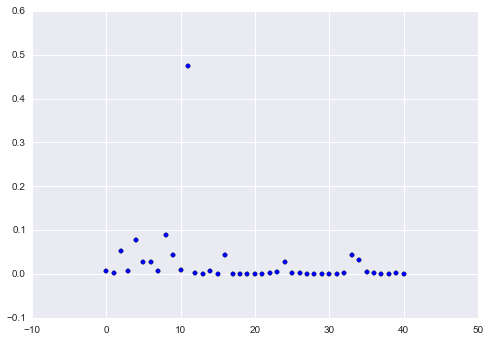

In [124]:
model = RandomForestRegressor(25,max_depth = 17).fit(X,y)
print(model.feature_importances_)
print(df.info())
plt.scatter(range(41),model.feature_importances_)

Plotting the validation curve, define the scoring by rms error, and plot with error bar.

In [95]:
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((np.log(y_pred+1)-np.log(y+1)) ** 2))
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
    


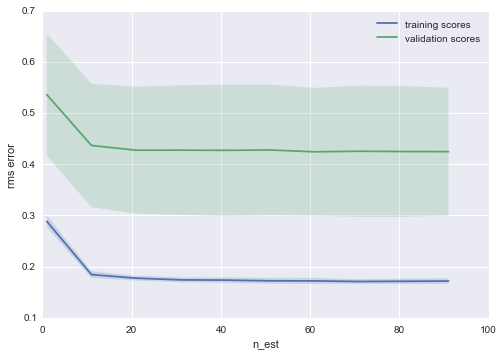

In [99]:
#varying the n_estimators
n_est = range(1,100,10)
val_train, val_test = validation_curve(RandomForestRegressor(max_depth = 17), X, y,
                                       'n_estimators',n_est, cv=10,
                                       scoring=rms_error)
plot_with_err(n_est, val_train, label='training scores')
plot_with_err(n_est, val_test, label='validation scores')
plt.xlabel('n_est'); plt.ylabel('rms error')
plt.legend();

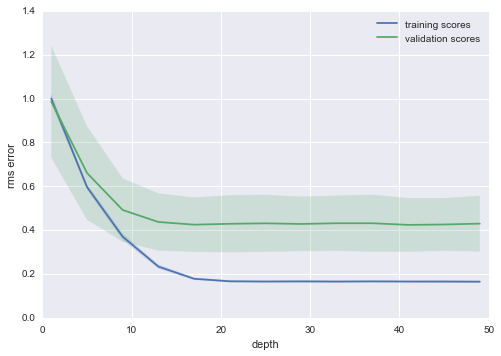

In [96]:
#varying the max_depth
depth = range(1,50,4)
val_train, val_test = validation_curve(RandomForestRegressor(n_estimators = 20), X, y,
                                       'max_depth',depth, cv=10,
                                       scoring=rms_error)
plot_with_err(depth, val_train, label='training scores')
plot_with_err(depth, val_test, label='validation scores')
plt.xlabel('depth'); plt.ylabel('rms error')
plt.legend();

From the first trial of plotting validation curve, it seems like with max_depth ~ 7 to 12, and n_estimators = 15 to 20, the model seems to perform well enough in cross validation data. Now we plot the learning curve.

In [125]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(n_est = 200,depth = 20):
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(RandomForestRegressor(n_estimators=n_est,max_depth=depth),
                                                  X, y, train_sizes, cv=5,
                                                  scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    #plt.ylim(0, 0.1)
    #plt.xlim(5, 80)
    plt.legend()    

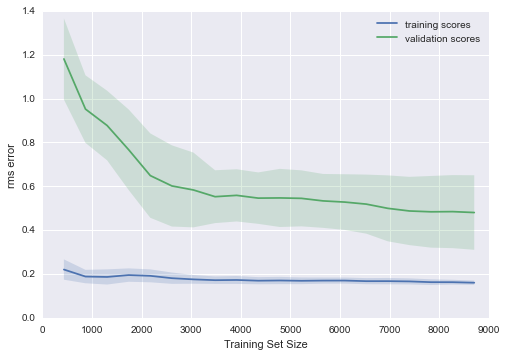

In [126]:
plot_learning_curve(200,19)

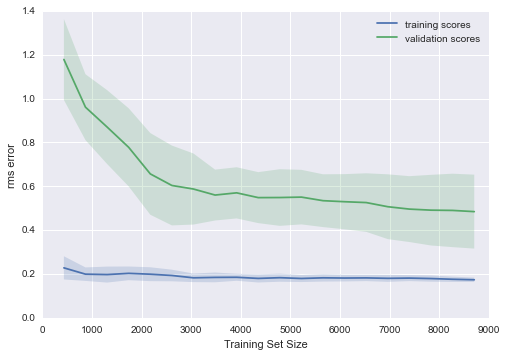

In [104]:
plot_learning_curve(25,17)

Calculating for the test value

In [84]:
y_test = RandomForestRegressor(n_estimators=20,max_depth=13).fit(X,y).predict(X_test)
resultdf = pd.DataFrame(df_test['datetime'])
resultdf['count'] = y_test
resultdf.to_csv('randomforest.csv',index=False)

In [98]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,hour24
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,0,0,0,0,0,0,0,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,date,hour,weather1,weather2,weather3,weather4,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,...,16,2011,1,1,0,1,0,0,0,6
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,...,40,2011,1,1,1,1,0,0,0,6
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,...,32,2011,1,1,2,1,0,0,0,6
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,...,13,2011,1,1,3,1,0,0,0,6
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,...,1,2011,1,1,4,1,0,0,0,6


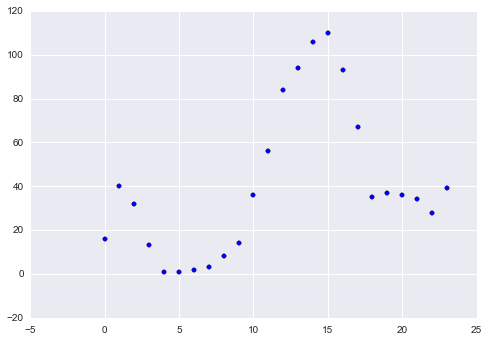

In [281]:
plt.scatter(range(len(df[0:24])),df['count'][0:24])

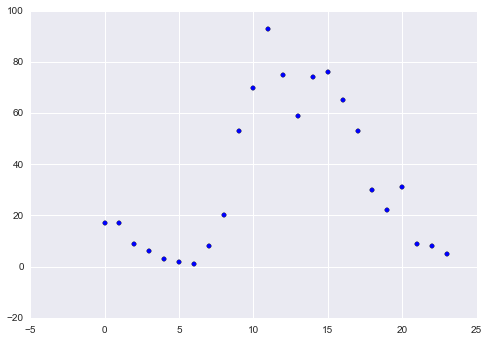

In [282]:
plt.scatter(range(len(df[24:48])),df['count'][24:48])

In [280]:
df.date[0:20]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: date, dtype: float64